In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import urllib.parse
import matplotlib.pyplot as plt

In [3]:
# The table that is being studied:

source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD' \
         '%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0' \
         '%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print('The birth rate in the regions of Ukraine (1950—2019):')
print(df)

The birth rate in the regions of Ukraine (1950—2019):
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  1

In [4]:
# Output the first rows of the table using the "head" method
print("The first rows of the table:")
print(df.head())

The first rows of the table:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [5]:
# Define the number of rows and columns in the dataframe ("shape" attribute)
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 28, Number of columns: 9


In [6]:
# In the table, replace the value "—" with the value NaN
df = df.replace({'—': np.NaN})
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [7]:
# Define the types of all columns using "dataframe.dtypes"
print("Column types:")
print(df.dtypes)

Column types:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [8]:
# Replace non-numeric column types with numeric ones
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)
print("Column types:")
print(df.dtypes)

Column types:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [9]:
# Calculate the percentage of blanks in each column (use "isnull" and "sum" methods)
missing_data_fraction = df.isnull().sum() / len(df)
print("The percentage of gaps in each column:")
print(missing_data_fraction)

The percentage of gaps in each column:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [10]:
# Delete the countrywide data from the table, the last row of the table
df = df.iloc[:-1]
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [11]:
# Replace missing data in columns with the average values of those columns ("fillna" method)
df = df.fillna(df.mean(numeric_only=True), axis=0)
df = df.round(1) # limit the number of characters after the comma
print("Table after filling NaN:")
print(df)

Table after filling NaN:
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9  

In [12]:
# Get a list of regions where the birth rate in 2019 was higher than the average for Ukraine
average_birth_2019 = df['2019'].mean()
regions_above_average_2019 = df[df['2019'] > average_birth_2019]['Регіон']
print(f"Average birth rate in 2019 - {average_birth_2019}")
print("Regions with an above-average birth rate in 2019:")
print(regions_above_average_2019)

Average birth rate in 2019 - 8.014814814814814
Regions with an above-average birth rate in 2019:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [13]:
# Which region had the highest birth rate in 2014?
highest_birth_2014 = df.loc[df['2014'].idxmax(), 'Регіон']
print(f"The region with the highest birth rate in 2014: {highest_birth_2014}")

The region with the highest birth rate in 2014: Рівненська


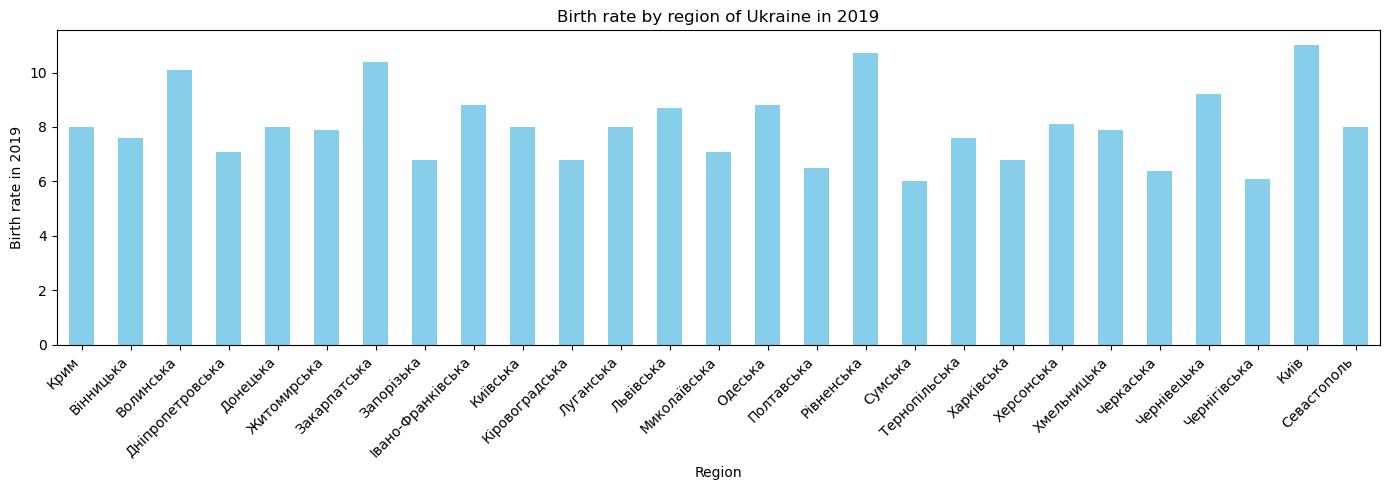

In [14]:
# Construct a bar chart of birth rates by region in 2019
fig, ax = plt.subplots(figsize=(14, 5))
df.plot(kind='bar', x='Регіон', y='2019', color='skyblue', legend=False, ax=ax)
ax.set_ylabel('Birth rate in 2019')
ax.set_xlabel('Region')
ax.set_title('Birth rate by region of Ukraine in 2019')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

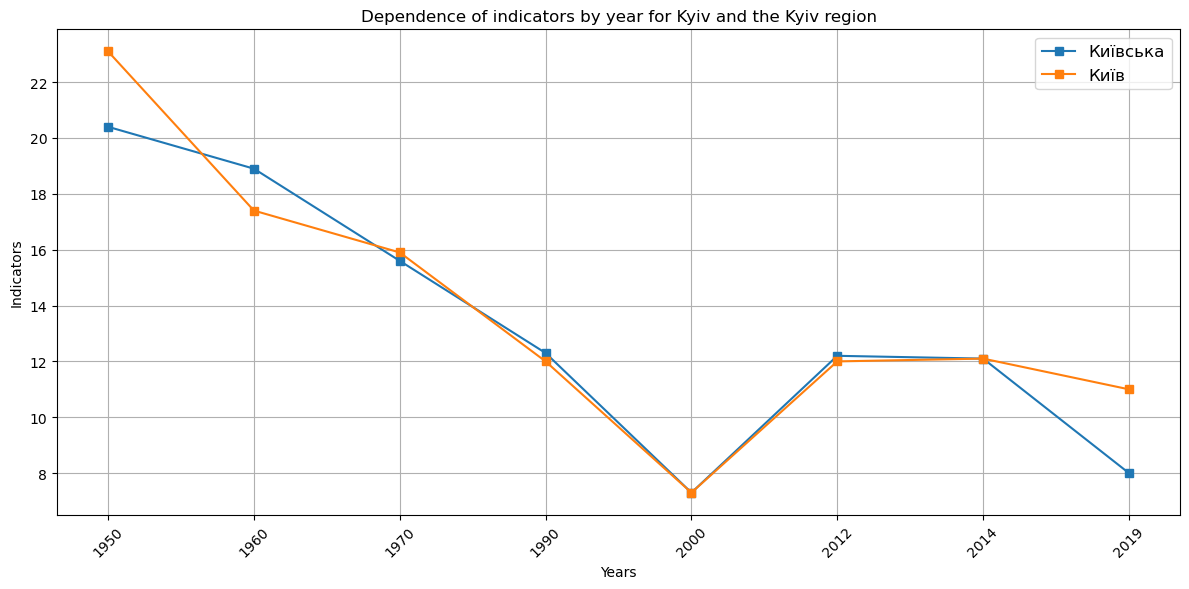

In [15]:
# Construct a graph of the dependence of indicators by year for Kyiv and the Kyiv region
filtered_df = df[df['Регіон'].isin(['Київ', 'Київська'])]
year_columns = [col for col in df.columns if col.isdigit()]
plt.figure(figsize=(12, 6))
for index, row in filtered_df.iterrows():
    plt.plot(year_columns, row[year_columns], linestyle='-', marker='s', label=row['Регіон'])
plt.title('Dependence of indicators by year for Kyiv and the Kyiv region')
plt.xlabel('Years')
plt.ylabel('Indicators')
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize='large')
plt.grid(True)
plt.tight_layout()
plt.show()